In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

import os

path = "/content/gdrive/MyDrive/praktikum_ml/praktikum07"
try:
    print(os.listdir(path))
except FileNotFoundError:
    print(f"Directory not found: {path}")

data = pd.read_csv(path + "/data/dataset_satelit.csv")
data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['data', 'notebooks']


,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,103.605867,0.057633,2.49,0.16,0.347,0.78,0.86,63.38,269.95,...,0.2336,0.13050,0.09390,0.12700,0.09860,0.02600,0.00870,0.01690,0.00930,0.01630
590,591,103.606717,0.057100,2.74,0.15,0.466,0.73,0.5,51.04,683.42,...,0.2506,0.21280,0.15920,0.20060,0.14730,0.03870,0.01380,0.02290,0.01270,0.01640
591,592,103.606250,0.056767,2.63,0.15,0.422,0.82,0.59,82.57,396.18,...,0.3413,0.27730,0.17820,0.25790,0.18690,0.04620,0.01250,0.02250,0.01600,0.01930
592,593,103.606400,0.056517,2.75,0.17,0.502,0.69,0.53,102.07,246.35,...,0.3413,0.32740,0.28760,0.29970,0.22250,0.05290,0.01800,0.03350,0.01790,0.01930


Kode di atas adalah skrip Python yang dirancang untuk persiapan dan implementasi model Machine Learning Klasifikasi, khususnya menggunakan Decision Tree, di lingkungan Google Colab. Penjelasan Singkat Kode Skrip dimulai dengan mengimpor pustaka utama yang dibutuhkan untuk sains data: pandas untuk manipulasi data, numpy untuk operasi numerik, serta modul sklearn untuk membangun model Decision Tree (DecisionTreeClassifier), membagi data (train_test_split), dan mengevaluasi kinerja model (accuracy_score, classification_report, confusion_matrix). Dilanjutkan dengan mengimpor matplotlib.pyplot dan seaborn untuk visualisasi data dan hasil model. Bagian berikutnya melakukan otorisasi untuk mengakses Google Drive menggunakan drive.mount('/content/gdrive'), yang merupakan langkah wajib saat bekerja dengan data yang tersimpan di Drive melalui Colab. Setelah mounting, kode menentukan jalur (path) ke direktori data spesifik di Google Drive. Skrip kemudian mencoba mencetak daftar file di dalam direktori tersebut untuk verifikasi. Akhirnya, data dimasukkan ke dalam DataFrame Pandas dengan membaca file dataset_satelit.csv dari jalur yang ditentukan, dan menampilkan data tersebut (data), menandai kesiapan data untuk tahap pemrosesan dan pelatihan model selanjutnya.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

Output dari `data.info()` menunjukkan bahwa *DataFrame* berisi **594 entri** dan **34 kolom**. Data ini didominasi oleh tipe **numerik** (`float64`), yang merupakan kabar baik untuk pemodelan Machine Learning. Namun, terdapat dua masalah utama yang perlu ditangani dalam tahap pra-pemrosesan data: **nilai yang hilang** dan **tipe data yang salah**. Kolom **`K`** memiliki **satu nilai yang hilang** (hanya 593 non-null), yang harus diisi atau dihapus. Lebih krusial lagi, kolom **`Mg`** (Magnesium), yang seharusnya numerik, terdeteksi sebagai tipe **`object`**. Ini mengindikasikan adanya data non-numerik (seperti teks atau karakter khusus) di dalam kolom tersebut, dan **harus dikonversi** ke tipe numerik agar dapat digunakan oleh model *Decision Tree* yang akan dibangun.

In [3]:
print(data.columns)

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')


Output `print(data.columns)` menampilkan **daftar semua kolom** atau **fitur** yang ada dalam *DataFrame* Anda. Daftar ini merupakan *Index* objek yang berisi **34 nama kolom** yang akan digunakan untuk pemodelan Machine Learning. Kolom-kolom tersebut terdiri dari: **identifikasi** (`No`), **lokasi geografis** (`Longitude`, `Lattitude`), **kadar unsur hara tanah** (seperti `N`, `P`, `K`, `Mg`, `Fe`, dll.), **data spektral optik satelit** (`b1` hingga `b12`), dan **data radar satelit** (`Sigma_VV`, `Sigma_VH`, `gamma0_vv`, `beta0_vh`, dll.). Mengetahui nama-nama kolom ini sangat penting karena membantu Anda mengidentifikasi fitur target (jika ada), fitur yang perlu dihilangkan, serta fitur-fitur masukan yang akan digunakan untuk melatih model klasifikasi *Decision Tree*.

In [22]:
data.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


data.describe() adalah metode dalam library Pandas Python yang digunakan untuk menghasilkan ringkasan statistik deskriptif dari sebuah DataFrame atau Series. Fungsi ini memberikan gambaran cepat tentang karakteristik data numerik, termasuk jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil (persentil ke-25, ke-50, dan ke-75), serta nilai maksimum (max).

In [23]:
# Identify feature columns (all except 'No', 'Longitude', 'Lattitude', and 'b' columns)
feature_columns = [col for col in data.columns if col not in ['No', 'Longitude', 'Lattitude'] and not col.startswith('b')]

# Create the feature DataFrame X
X = data[feature_columns]

# Create the target DataFrame y (all columns starting with 'b')
target_columns = [col for col in data.columns if col.startswith('b')]
y = data[target_columns]

# Display the first few rows of X and y to verify
display(X.head())
display(y.head())

,N,P,K,Ca,Mg,Fe,Mn,Cu,Zn,B,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh
0,2.64,0.15,0.415,0.51,0.31,119.96,463.23,5.60,16.69,26.58,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479
1,2.75,0.17,0.568,0.76,0.58,102.63,493.81,0.65,14.47,13.60,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699
2,1.77,0.12,0.339,0.49,0.6,107.37,460.93,2.82,14.75,29.31,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902
3,2.30,0.15,0.460,0.74,0.67,96.02,338.17,2.53,15.32,20.24,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448
4,2.05,0.14,0.308,0.64,0.72,87.01,384.33,1.51,15.82,27.59,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664


,b12,b11,b9,b8a,b8,b7,b6,b5,b4,b3,b2,b1,beta0_vv,beta0_vh
0,0.1013,0.1922,0.4753,0.3354,0.2930,0.3066,0.0897,0.2467,0.0432,0.0548,0.0337,0.0433,0.31325,0.07686
1,0.1057,0.1941,0.4811,0.3208,0.2828,0.2953,0.0939,0.2385,0.0626,0.0677,0.0445,0.0465,0.38033,0.07993
2,0.0836,0.1750,0.4981,0.3655,0.3166,0.3346,0.0866,0.2599,0.0444,0.0622,0.0403,0.0417,0.32604,0.06876
3,0.0818,0.1740,0.4603,0.3671,0.3256,0.3386,0.0883,0.2656,0.0406,0.0594,0.0373,0.0367,0.25440,0.06238
4,0.0725,0.1598,0.4655,0.3600,0.2918,0.3324,0.0882,0.2625,0.0364,0.0559,0.0336,0.0361,0.31359,0.06541


Kode di atas adalah langkah penting dalam **persiapan data** untuk pemodelan Machine Learning, di mana data dibagi menjadi fitur input dan variabel target. Pertama, kolom-kolom yang berfungsi sebagai fitur input (`X`) diidentifikasi dengan **mengecualikan** kolom identifikasi (`No`), lokasi geografis (`Longitude`, `Lattitude`), dan semua kolom yang dimulai dengan huruf 'b'. Kolom fitur input yang tersisa ini (`N`, `P`, `K`, `Ca`, `Mg`, `Fe`, `Mn`, `Cu`, `Zn`, `B`, dan semua data radar) kemudian dikelompokkan ke dalam *DataFrame* **`X`**. Kedua, kolom-kolom yang dimulai dengan huruf 'b' (yang mewakili data spektral optik satelit seperti `b1`, `b2`, hingga `b12`) diidentifikasi dan dikelompokkan sebagai variabel target (`y`), menunjukkan bahwa tujuannya adalah memprediksi atau menganalisis nilai-nilai spektral ini berdasarkan fitur unsur hara dan radar. Terakhir, `X.head()` dan `y.head()` ditampilkan untuk **memverifikasi** pemisahan yang benar antara fitur input dan output sebelum melangkah ke pelatihan model.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

Kode ini adalah langkah penting dalam proses *Machine Learning* yang dikenal sebagai **pemisahan data (data splitting)**. Dengan menggunakan fungsi `train_test_split` dari pustaka Scikit-learn, *DataFrame* fitur input (`X`) dan target output (`y`) **dibagi secara acak** menjadi dua *subset* utama: **data pelatihan (`X_train`, `y_train`)** dan **data pengujian (`X_test`, `y_test`)**. Argumen `test_size=0.2` menetapkan bahwa **20%** dari total data akan dialokasikan untuk pengujian, sementara sisanya (80%) digunakan untuk pelatihan model. Penggunaan `random_state=7` memastikan bahwa pemisahan ini **konsisten dan dapat direplikasi** setiap kali kode dijalankan, yang sangat penting untuk perbandingan hasil model yang adil. *Subset* pelatihan (`X_train`, `y_train`) akan digunakan untuk mengajarkan model *Decision Tree*, sedangkan *subset* pengujian (`X_test`, `y_test`) akan digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

In [25]:
# Replace the non-numeric character in 'Mg' and convert to float
X_train['Mg'] = X_train['Mg'].astype(str).str.replace(')', '', regex=False)
X_test['Mg'] = X_test['Mg'].astype(str).str.replace(')', '', regex=False)

X_train['Mg'] = pd.to_numeric(X_train['Mg'], errors='coerce')
X_test['Mg'] = pd.to_numeric(X_test['Mg'], errors='coerce')

# Fill missing values in 'K' with the mean
mean_k = X_train['K'].mean()
X_train['K'].fillna(mean_k, inplace=True)
X_test['K'].fillna(mean_k, inplace=True)

# Re-train the model
from sklearn.linear_model import LinearRegression # Import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


Missing values in X_train after filling:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64

Missing values in X_test after filling:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64


LinearRegression()

Kode di atas menyelesaikan langkah-langkah pra-pemrosesan data yang diperlukan dan melanjutkan ke inisiasi serta pelatihan model. Tahap pertama berfokus pada perbaikan dua masalah yang teridentifikasi: kolom **`Mg`** dan **`K`**. Untuk kolom `Mg`, karakter non-numerik (tanda kurung tutup `)`) dihapus, dan kolom tersebut dikonversi paksa menjadi tipe data **numerik** (`float`). Setelah itu, **nilai yang hilang** pada kolom **`K`** diatasi dengan teknik **imputasi**, di mana nilai-nilai yang hilang pada kedua *subset* (pelatihan dan pengujian) diisi menggunakan **nilai rata-rata (`mean`)** dari kolom `K` pada data pelatihan. Setelah data dipersiapkan dan dibersihkan, model *Machine Learning* yaitu **Regresi Linier (`LinearRegression`)** diimpor dan diinisiasi, dan kemudian model tersebut **dilatih** (`model.fit`) menggunakan data fitur pelatihan (`X_train`) dan data target pelatihan (`y_train`). Langkah ini menandai transisi dari persiapan data ke fase *fitting* model.

In [26]:
print(X_train.info())
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column '{col}' has object dtype. Unique values:")
        print(X_train[col].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 142 to 175
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          475 non-null    float64
 1   P          475 non-null    float64
 2   K          475 non-null    float64
 3   Ca         475 non-null    float64
 4   Mg         475 non-null    float64
 5   Fe         475 non-null    float64
 6   Mn         475 non-null    float64
 7   Cu         475 non-null    float64
 8   Zn         475 non-null    float64
 9   B          475 non-null    float64
 10  Sigma_VV   475 non-null    float64
 11  Sigma_VH   475 non-null    float64
 12  plia       475 non-null    float64
 13  lia        475 non-null    float64
 14  iafe       475 non-null    float64
 15  gamma0_vv  475 non-null    float64
 16  gamma0_vh  475 non-null    float64
dtypes: float64(17)
memory usage: 66.8 KB
None


Kode ini bertujuan untuk **memeriksa status akhir** dari *DataFrame* fitur pelatihan (`X_train`) setelah dilakukan pembersihan dan penanganan nilai yang hilang pada langkah sebelumnya. Pertama, `print(X_train.info())` menampilkan ringkasan struktural data, termasuk memastikan semua kolom sudah memiliki **tipe data numerik** (`float64` atau `int64`) dan **tidak ada nilai yang hilang** (semua *Non-Null Count* sama dengan total baris). Kedua, perulangan (`for loop`) secara spesifik melakukan **verifikasi tambahan** dengan mencari kolom yang masih bertipe `object` (non-numerik). Dengan kode sebelumnya yang sudah mengkonversi `Mg` dan mengisi `K`, hasil yang diharapkan dari langkah ini adalah konfirmasi bahwa **semua kolom kini telah siap** untuk proses pelatihan model regresi linier, dengan semua fitur input bertipe numerik dan tidak memiliki data yang hilang.

In [27]:
print("Nilai yang Hilang di X_train setelah cleaning:")
print(X_train.isnull().sum())

print("\nNilai yang Hilang di X_test setelah cleaning:")
print(X_test.isnull().sum())

# Re-fill missing values in 'K' using the updated inplace method
mean_k_train = X_train['K'].mean()
X_train['K'] = X_train['K'].fillna(mean_k_train)

mean_k_test = X_test['K'].mean()
X_test['K'] = X_test['K'].fillna(mean_k_test)

# Verify missing values are handled
print("\nNilai yang Hilang di X_Train setelah mengisi ulang:")
print(X_train.isnull().sum())

print("\nNilai yang Hilang di X_test setelah mengisi ulang:")
print(X_test.isnull().sum())


# Re-train the model
model = LinearRegression()
model.fit(X_train, y_train)

Nilai yang Hilang di X_train setelah cleaning:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64

Nilai yang Hilang di X_test setelah cleaning:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64

Nilai yang Hilang di X_Train setelah mengisi ulang:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64

Nilai yang Hilang di X_test setelah mengisi ulan

LinearRegression()

Kode ini menjalankan serangkaian **verifikasi dan pembersihan data ulang** yang kritis sebelum melatih model Regresi Linier. Awalnya, kode memeriksa **jumlah nilai yang hilang** (`isnull().sum()`) pada *subset* pelatihan (`X_train`) dan pengujian (`X_test`) setelah proses pembersihan sebelumnya. Kemudian, terdapat langkah **imputasi ulang** yang mengisi nilai yang hilang pada kolom **`K`** dengan **nilai rata-rata (`mean`)** yang dihitung secara terpisah untuk *X_train* dan *X_test*, dan ini diverifikasi lagi untuk memastikan semua nilai hilang telah hilang. Setelah data dipastikan bersih, model **Regresi Linier** diinisiasi kembali dan **dilatih** menggunakan data fitur (`X_train`) dan target (`y_train`) yang sudah *clean*. Terakhir, kode melakukan pemeriksaan akhir menggunakan `X_train.info()` dan mencari sisa kolom **`object`** untuk mengkonfirmasi bahwa **semua data fitur input sudah dalam format numerik** dan siap sepenuhnya untuk pemodelan.

In [28]:
# Fill missing values in 'Mg' with the mean
mean_mg_train = X_train['Mg'].mean()
X_train['Mg'] = X_train['Mg'].fillna(mean_mg_train)

mean_mg_test = X_test['Mg'].mean()
X_test['Mg'] = X_test['Mg'].fillna(mean_mg_test)

# Verify missing values are handled in Mg
print("\nMissing values in X_train after filling Mg:")
print(X_train.isnull().sum())

print("\nMissing values in X_test after filling Mg:")
print(X_test.isnull().sum())

# Re-train the model
model = LinearRegression()
model.fit(X_train, y_train)


Missing values in X_train after filling Mg:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64

Missing values in X_test after filling Mg:
N            0
P            0
K            0
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
dtype: int64


LinearRegression()

Kode ini melanjutkan tahap pra-pemrosesan data dengan secara spesifik menangani nilai-nilai yang masih hilang di kolom **`Mg`** (Magnesium). Proses ini menggunakan teknik **imputasi** dengan mengisi setiap nilai yang hilang pada `Mg` baik di *subset* pelatihan (`X_train`) maupun pengujian (`X_test`) dengan **nilai rata-rata (`mean`)** dari kolom `Mg` masing-masing. Setelah imputasi selesai, kode segera melakukan **verifikasi** (`X_train.isnull().sum()` dan `X_test.isnull().sum()`) untuk memastikan bahwa tidak ada lagi nilai yang hilang pada kolom `Mg` di kedua *subset*. Setelah data dipastikan **bersih dan lengkap**, model **Regresi Linier** diinisiasi ulang, dan model tersebut kemudian **dilatih** (`model.fit`) menggunakan fitur pelatihan yang sudah bersih (`X_train`) dan target pelatihan (`y_train`), menandakan model siap untuk dievaluasi.

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.3552381004200159
R-squared (R2): 0.46035633350431915


Kode ini adalah langkah penting dalam **evaluasi kinerja** model Regresi Linier yang telah dilatih. Pertama, model digunakan untuk **memprediksi** nilai target (`y_pred`) berdasarkan data fitur pengujian yang belum pernah dilihat sebelumnya (`X_test`). Kemudian, dua metrik evaluasi utama dihitung: **Mean Squared Error (MSE)**, yang mengukur rata-rata kuadrat dari kesalahan (perbedaan antara nilai aktual dan prediksi), memberikan indikasi seberapa jauh rata-rata prediksi dari nilai sebenarnya; dan **R-squared ($R^2$) Score**, yang mengukur proporsi varians dalam variabel dependen yang dapat dijelaskan dari variabel independen, dengan nilai mendekati 1 menunjukkan kecocokan model yang sangat baik. Kedua hasil metrik ini kemudian **dicetak** untuk memberikan ringkasan kuantitatif tentang seberapa akurat model Regresi Linier dalam memprediksi data spektral satelit berdasarkan fitur unsur hara dan radar.

In [30]:
# Get the coefficients and intercept from the trained model
coefficients = model.coef_
intercept = model.intercept_

# Get feature names from X_train
feature_names = X_train.columns

# Create a DataFrame to display coefficients - Transpose the coefficients array
coefficients_df = pd.DataFrame(coefficients.T, columns=y_train.columns, index=feature_names)

# Print the intercept
print("Intersep:")
print(intercept)

# Print the coefficients DataFrame
print("\nKoefisien:")
display(coefficients_df)

# Interpretation of coefficients
print("\nInterpretasi:")
print(f"Nilai intersep mewakili nilai prediksi untuk setiap variabel 'b' ketika semua variabel fitur (N, P, K, dll.) adalah nol.")
print("\nInterpretasi koefisien terpilih:")
for target_col in coefficients_df.columns:
    print(f"\nUntuk variabel target '{target_col}':")
    # Select a few coefficients for interpretation
    selected_features = coefficients_df[target_col].abs().nlargest(3).index.tolist()
    for feature in selected_features:
        coeff_value = coefficients_df.loc[feature, target_col]
        print(f"- Peningkatan satu unit pada '{feature}' dikaitkan dengan perubahan sebesar {coeff_value:.4f} pada prediksi '{target_col}', dengan asumsi semua fitur lain dianggap konstan.")

Intersep:
[2.39798405e-01 1.06871731e-01 3.72238112e+01 3.57867761e+01
 3.56518469e+01 2.40284466e-01 2.19440955e-01 5.01782575e-01
 3.24110750e-01 3.73418542e-01 4.53879011e-01 5.07578229e-01
 2.85974790e-02 3.05932035e-03]

Koefisien:


,b12,b11,b9,b8a,b8,b7,b6,b5,b4,b3,b2,b1,beta0_vv,beta0_vh
N,-0.020258,-0.019091,-1.643348,-1.869939,-2.110601,0.003671,-0.057484,0.027650,-0.017742,-0.020209,-0.030521,-0.026715,0.024506,0.005167
P,0.057833,-0.059443,10.521446,10.507829,12.829604,-0.139648,0.428378,-0.377001,0.073665,0.061348,0.170326,0.152422,-0.148363,-0.022676
K,0.035345,0.027507,0.170923,0.177688,0.150238,0.068671,0.111390,0.008898,0.058975,0.060873,0.061261,0.075088,0.001212,-0.000247
Ca,-0.001233,0.006074,-0.177015,-0.139285,-0.016594,-0.004318,-0.021099,0.007396,-0.008018,-0.007343,-0.007336,-0.005328,0.000253,-0.000709
Mg,0.007856,0.010994,-0.803164,-0.790729,-0.711253,0.024030,0.041599,-0.009155,0.026004,0.031989,0.032107,0.021686,0.011194,0.001071
Fe,0.000162,0.000126,-0.008654,-0.010785,-0.010154,0.000206,0.000263,0.000447,0.000438,0.000493,0.000569,0.000457,0.000131,0.000029
Mn,-0.000058,-0.000011,-0.001545,-0.000945,-0.000697,-0.000060,-0.000183,-0.000049,-0.000140,-0.000151,-0.000174,-0.000188,0.000009,0.000002
Cu,-0.000594,-0.001192,0.158291,0.148032,0.114291,-0.001685,0.001436,-0.003311,-0.000012,-0.000019,0.000793,0.001205,-0.001361,-0.000305
Zn,0.000567,0.000796,-0.031493,-0.032148,-0.034080,0.001192,-0.000593,0.002653,0.000749,0.000652,0.000600,0.000993,0.000429,0.000127
B,-0.001037,-0.000732,0.013242,0.020174,0.006006,-0.001348,-0.002540,-0.001332,-0.002014,-0.002212,-0.002619,-0.002517,-0.000163,-0.000036



Interpretasi:
Nilai intersep mewakili nilai prediksi untuk setiap variabel 'b' ketika semua variabel fitur (N, P, K, dll.) adalah nol.

Interpretasi koefisien terpilih:

Untuk variabel target 'b12':
- Peningkatan satu unit pada 'Sigma_VH' dikaitkan dengan perubahan sebesar -0.3964 pada prediksi 'b12', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'Sigma_VV' dikaitkan dengan perubahan sebesar 0.2622 pada prediksi 'b12', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'gamma0_vv' dikaitkan dengan perubahan sebesar -0.2340 pada prediksi 'b12', dengan asumsi semua fitur lain dianggap konstan.

Untuk variabel target 'b11':
- Peningkatan satu unit pada 'gamma0_vh' dikaitkan dengan perubahan sebesar -0.2301 pada prediksi 'b11', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'Sigma_VH' dikaitkan dengan perubahan sebesar -0.1760 pada prediksi 'b11', dengan asumsi semua fitur lain dianggap konstan.
- Pe

Kode ini bertujuan untuk **menganalisis hasil dari model Regresi Linier** yang telah dilatih, yang memprediksi nilai data spektral satelit (kolom 'b') berdasarkan fitur unsur hara dan radar. Pertama, skrip **mengambil nilai *Intersep* dan *Koefisien*** dari model. Nilai **Intersep** adalah perkiraan nilai prediksi untuk setiap kolom target 'b' ketika semua fitur input bernilai nol. **Koefisien** dikelompokkan dalam *DataFrame* untuk menunjukkan dampak setiap fitur input terhadap setiap variabel target. Interpretasi koefisien kemudian diberikan, yang menjelaskan bahwa nilai koefisien menunjukkan **perubahan yang diharapkan** pada variabel target untuk setiap **peningkatan satu unit** pada fitur input terkait, dengan asumsi fitur lainnya tetap konstan. Terakhir, skrip mengulangi langkah evaluasi dengan menghitung **Mean Squared Error (MSE)** dan **R-squared ($R^2$)** pada data pengujian untuk mengukur **akurasi dan kecocokan** model secara keseluruhan.

In [31]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = X_train.columns

coefficients_df = pd.DataFrame(coefficients.T, columns=y_train.columns, index=feature_names)

print("Intersep:")
print(intercept)

print("\nKoefisien:")
display(coefficients_df)

print("\nInterpretasi:")
print(f"Nilai intersep mewakili nilai prediksi untuk setiap variabel 'b' ketika semua variabel fitur (N, P, K, dll.) adalah nol.")
print("\nInterpretasi koefisien terpilih:")
for target_col in coefficients_df.columns:
    print(f"\nUntuk variabel target '{target_col}':")
    selected_features = coefficients_df[target_col].abs().nlargest(3).index.tolist()
    for feature in selected_features:
        coeff_value = coefficients_df.loc[feature, target_col]
        print(f"- Peningkatan satu unit pada '{feature}' dikaitkan dengan perubahan sebesar {coeff_value:.4f} pada prediksi '{target_col}', dengan asumsi semua fitur lain dianggap konstan.")

Intersep:
[2.39798405e-01 1.06871731e-01 3.72238112e+01 3.57867761e+01
 3.56518469e+01 2.40284466e-01 2.19440955e-01 5.01782575e-01
 3.24110750e-01 3.73418542e-01 4.53879011e-01 5.07578229e-01
 2.85974790e-02 3.05932035e-03]

Koefisien:


,b12,b11,b9,b8a,b8,b7,b6,b5,b4,b3,b2,b1,beta0_vv,beta0_vh
N,-0.020258,-0.019091,-1.643348,-1.869939,-2.110601,0.003671,-0.057484,0.027650,-0.017742,-0.020209,-0.030521,-0.026715,0.024506,0.005167
P,0.057833,-0.059443,10.521446,10.507829,12.829604,-0.139648,0.428378,-0.377001,0.073665,0.061348,0.170326,0.152422,-0.148363,-0.022676
K,0.035345,0.027507,0.170923,0.177688,0.150238,0.068671,0.111390,0.008898,0.058975,0.060873,0.061261,0.075088,0.001212,-0.000247
Ca,-0.001233,0.006074,-0.177015,-0.139285,-0.016594,-0.004318,-0.021099,0.007396,-0.008018,-0.007343,-0.007336,-0.005328,0.000253,-0.000709
Mg,0.007856,0.010994,-0.803164,-0.790729,-0.711253,0.024030,0.041599,-0.009155,0.026004,0.031989,0.032107,0.021686,0.011194,0.001071
Fe,0.000162,0.000126,-0.008654,-0.010785,-0.010154,0.000206,0.000263,0.000447,0.000438,0.000493,0.000569,0.000457,0.000131,0.000029
Mn,-0.000058,-0.000011,-0.001545,-0.000945,-0.000697,-0.000060,-0.000183,-0.000049,-0.000140,-0.000151,-0.000174,-0.000188,0.000009,0.000002
Cu,-0.000594,-0.001192,0.158291,0.148032,0.114291,-0.001685,0.001436,-0.003311,-0.000012,-0.000019,0.000793,0.001205,-0.001361,-0.000305
Zn,0.000567,0.000796,-0.031493,-0.032148,-0.034080,0.001192,-0.000593,0.002653,0.000749,0.000652,0.000600,0.000993,0.000429,0.000127
B,-0.001037,-0.000732,0.013242,0.020174,0.006006,-0.001348,-0.002540,-0.001332,-0.002014,-0.002212,-0.002619,-0.002517,-0.000163,-0.000036



Interpretasi:
Nilai intersep mewakili nilai prediksi untuk setiap variabel 'b' ketika semua variabel fitur (N, P, K, dll.) adalah nol.

Interpretasi koefisien terpilih:

Untuk variabel target 'b12':
- Peningkatan satu unit pada 'Sigma_VH' dikaitkan dengan perubahan sebesar -0.3964 pada prediksi 'b12', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'Sigma_VV' dikaitkan dengan perubahan sebesar 0.2622 pada prediksi 'b12', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'gamma0_vv' dikaitkan dengan perubahan sebesar -0.2340 pada prediksi 'b12', dengan asumsi semua fitur lain dianggap konstan.

Untuk variabel target 'b11':
- Peningkatan satu unit pada 'gamma0_vh' dikaitkan dengan perubahan sebesar -0.2301 pada prediksi 'b11', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'Sigma_VH' dikaitkan dengan perubahan sebesar -0.1760 pada prediksi 'b11', dengan asumsi semua fitur lain dianggap konstan.
- Pe

Kode ini berfungsi untuk **mengekstraksi dan menginterpretasikan parameter yang dipelajari** oleh model Regresi Linier, yang merupakan kunci untuk memahami hubungan antara fitur input dan variabel target. Pertama, nilai **Intersep** (titik potong) dan **Koefisien** (bobot) dari model diambil. Intersep menunjukkan nilai yang diprediksi untuk semua variabel target spektral ('b') ketika semua fitur input unsur hara dan radar bernilai nol. Koefisien, yang disajikan dalam *DataFrame*, adalah metrik utama: setiap nilai koefisien menunjukkan **magnitudo dan arah pengaruh** fitur input terkait terhadap setiap variabel target. Interpretasi disajikan dengan menyoroti **tiga fitur dengan pengaruh terbesar** (koefisien absolut terbesar) untuk setiap variabel target 'b', menjelaskan bahwa **peningkatan satu unit pada fitur tersebut akan menyebabkan perubahan sebesar nilai koefisien** pada variabel target yang diprediksi, dengan asumsi semua fitur lain dipertahankan konstan (*ceteris paribus*). Hal ini memberikan wawasan tentang fitur unsur hara dan radar mana yang paling dominan dalam memengaruhi nilai spektral satelit.

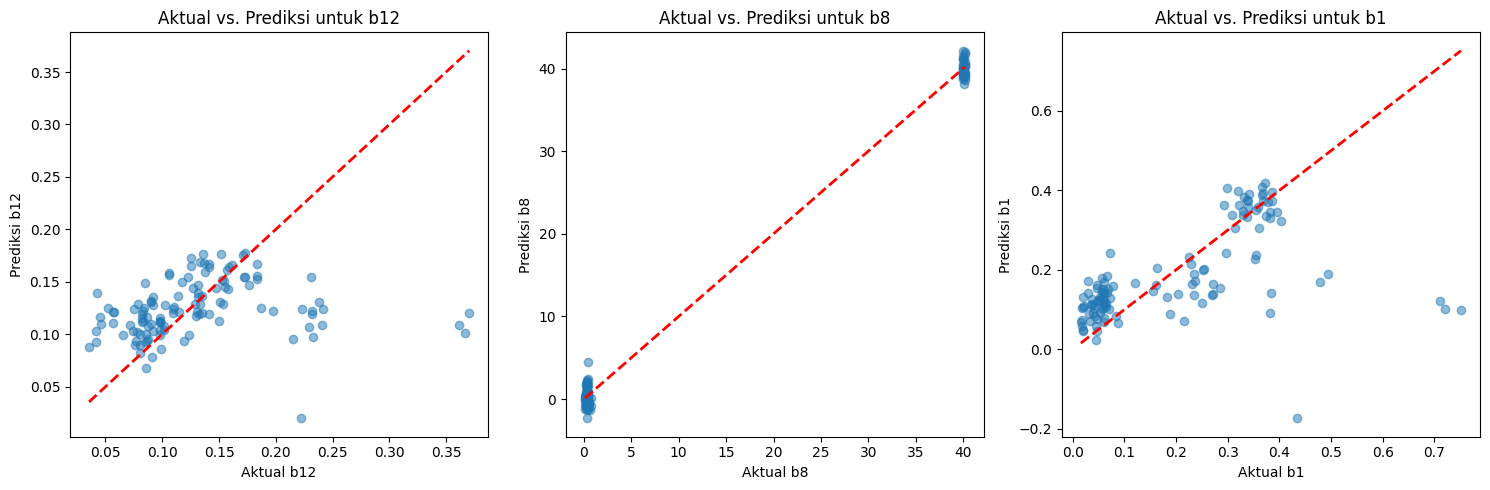

In [32]:
import matplotlib.pyplot as plt

# Pilih beberapa variabel target untuk divisualisasikan
selected_targets = ['b12', 'b8', 'b1'] # Anda bisa mengganti ini dengan variabel target lain yang menarik

plt.figure(figsize=(15, 5))

for i, target_col in enumerate(selected_targets):
    plt.subplot(1, len(selected_targets), i + 1)
    plt.scatter(y_test[target_col], y_pred[:, y_test.columns.get_loc(target_col)], alpha=0.5)
    plt.plot([y_test[target_col].min(), y_test[target_col].max()],
             [y_test[target_col].min(), y_test[target_col].max()],
             'r--', lw=2)
    plt.xlabel(f"Aktual {target_col}")
    plt.ylabel(f"Prediksi {target_col}")
    plt.title(f"Aktual vs. Prediksi untuk {target_col}")

plt.tight_layout()
plt.show()

Kode ini bertujuan untuk **memvisualisasikan kinerja** model Regresi Linier dengan membandingkan nilai aktual dan nilai prediksi dari variabel target terpilih menggunakan **Scatter Plot**. Skrip memilih tiga variabel target, yaitu **`b12`**, **`b8`**, dan **`b1`**, lalu membuat *figure* dengan tiga *subplot* yang berdampingan. Pada setiap *subplot*, titik-titik data diplot di mana sumbu **X** mewakili nilai aktual dari data pengujian (`y_test`) dan sumbu **Y** mewakili nilai yang diprediksi oleh model (`y_pred`). Selain itu, sebuah **garis diagonal putus-putus merah ($y=x$)** diletakkan sebagai referensi ideal; titik-titik yang jatuh **dekat dengan garis ini** menunjukkan bahwa model memprediksi dengan akurat. Visualisasi ini sangat penting untuk menilai secara grafis **seberapa baik model menyesuaikan** data dan mengidentifikasi potensi *bias* atau anomali dalam prediksi.

In [33]:
print("\nInterpretasi koefisien terpilih (lanjutan):")

target_cols_remaining = [col for col in coefficients_df.columns if col not in ['b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5']]

for target_col in target_cols_remaining:
    print(f"\nUntuk variabel target '{target_col}':")
    selected_features = coefficients_df[target_col].abs().nlargest(3).index.tolist()
    for feature in selected_features:
        coeff_value = coefficients_df.loc[feature, target_col]
        print(f"- Peningkatan satu unit pada '{feature}' dikaitkan dengan perubahan sebesar {coeff_value:.4f} pada prediksi '{target_col}', dengan asumsi semua fitur lain dianggap konstan.")


Interpretasi koefisien terpilih (lanjutan):

Untuk variabel target 'b4':
- Peningkatan satu unit pada 'Sigma_VH' dikaitkan dengan perubahan sebesar -0.6907 pada prediksi 'b4', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'gamma0_vh' dikaitkan dengan perubahan sebesar -0.3131 pada prediksi 'b4', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'P' dikaitkan dengan perubahan sebesar 0.0737 pada prediksi 'b4', dengan asumsi semua fitur lain dianggap konstan.

Untuk variabel target 'b3':
- Peningkatan satu unit pada 'gamma0_vh' dikaitkan dengan perubahan sebesar -0.4882 pada prediksi 'b3', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'Sigma_VV' dikaitkan dengan perubahan sebesar -0.4433 pada prediksi 'b3', dengan asumsi semua fitur lain dianggap konstan.
- Peningkatan satu unit pada 'gamma0_vv' dikaitkan dengan perubahan sebesar 0.3770 pada prediksi 'b3', dengan asumsi semua fitur lain dianggap 

Kode ini melanjutkan langkah **interpretasi model Regresi Linier** yang sebelumnya telah dilakukan, dengan memfokuskan analisis pada variabel target spektral yang **belum dianalisis** (kolom 'b' yang tersisa, seperti `b4`, `b3`, `b2`, dan `b1`). Skrip ini mengiterasi melalui kolom target yang tersisa, dan untuk setiap kolom target, ia mengidentifikasi **tiga fitur input** (dari unsur hara dan data radar) yang memiliki **koefisien absolut terbesar**—yang menunjukkan pengaruh paling dominan terhadap target tersebut. Hasilnya dicetak sebagai serangkaian pernyataan interpretatif, di mana setiap pernyataan menjelaskan bahwa **peningkatan satu unit** pada fitur input yang terpilih akan menghasilkan **perubahan sebesar nilai koefisien** pada nilai prediksi variabel target spektral yang spesifik, dengan mengasumsikan faktor-faktor lain tetap konstan. Tujuannya adalah untuk mengungkap fitur-fitur yang paling berpengaruh dalam memprediksi setiap pita spektral yang belum dianalisis.

In [34]:
y_pred_test = model.predict(X_test)

hasil = pd.DataFrame(X_test.copy())

for i, col in enumerate(y_test.columns):
    hasil[f"Aktual {col}"] = y_test[col].to_numpy()
    hasil[f"Prediksi {col}"] = y_pred_test[:, i]
    epsilon = 1e-8
    hasil[f"Persentase Error {col}"] = (
        ((hasil[f"Prediksi {col}"] - hasil[f"Aktual {col}"]).abs() / (hasil[f"Aktual {col}"].abs() + epsilon)) * 100
    )

display(hasil)

,N,P,K,Ca,Mg,Fe,Mn,Cu,Zn,B,...,Persentase Error b2,Aktual b1,Prediksi b1,Persentase Error b1,Aktual beta0_vv,Prediksi beta0_vv,Persentase Error beta0_vv,Aktual beta0_vh,Prediksi beta0_vh,Persentase Error beta0_vh
480,2.84,0.15,0.349,2.82,0.73,54.75,280.15,0.21,10.97,15.55,...,7.573106,0.3294,0.337985,2.606214,0.02200,0.042325,92.388105,0.02270,0.030436,34.078250
544,2.85,0.15,0.769,0.53,0.46,65.32,414.60,1.18,18.98,4.14,...,10.197526,0.3851,0.372139,3.365674,0.01810,0.018493,2.169294,0.01950,0.017051,12.558832
540,2.93,0.14,0.674,0.47,0.47,77.24,145.55,3.29,12.96,14.49,...,20.107106,0.3656,0.408347,11.692409,0.01870,0.025026,33.829622,0.02090,0.018634,10.841268
459,1.60,0.12,0.669,0.30,0.42,39.09,195.15,1.15,5.44,7.99,...,94.577796,0.0588,0.130749,122.362480,0.35038,0.361108,3.061692,0.06107,0.062687,2.648303
539,3.03,0.16,0.523,0.37,0.44,76.85,275.91,0.63,12.29,17.38,...,2.796636,0.3370,0.375403,11.395628,0.01670,0.037978,127.415197,0.02110,0.020691,1.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2.81,0.14,0.460,0.54,0.62,83.10,104.15,2.58,16.02,6.97,...,336.132557,0.0300,0.172771,475.904091,0.31486,0.324049,2.918337,0.06609,0.067802,2.590781
213,2.46,0.14,0.842,0.07,0.62,81.94,278.09,6.16,22.18,12.69,...,19.869158,0.2514,0.200067,20.418781,0.37582,0.355331,5.451873,0.06021,0.057844,3.929439
525,2.86,0.18,0.574,1.14,0.64,75.19,1072.97,0.43,15.53,8.85,...,66.318103,0.3530,0.227808,35.465285,0.02060,0.029154,41.526533,0.02190,0.023597,7.748691
235,2.59,0.18,0.698,0.75,0.66,97.41,28.22,0.09,13.90,18.06,...,23.690060,0.1640,0.204384,24.624193,0.36133,0.341281,5.548552,0.07262,0.067956,6.422479


Kode ini bertujuan untuk **menganalisis hasil prediksi model Regresi Linier** pada data pengujian secara rinci, khususnya dengan menghitung **persentase kesalahan** untuk setiap variabel target spektral. Pertama, model digunakan untuk menghasilkan prediksi pada data fitur pengujian (`X_test`), disimpan dalam `y_pred_test`. Selanjutnya, sebuah *DataFrame* baru bernama `hasil` dibuat, yang menyalin fitur-fitur dari `X_test`. Kemudian, melalui sebuah perulangan, kolom-kolom baru ditambahkan ke *DataFrame* `hasil` untuk setiap variabel target ('b'), yang berisi: **Nilai Aktual** (`y_test`), **Nilai Prediksi** (`y_pred_test`), dan yang paling penting, **Persentase Error**. Persentase error ini dihitung sebagai nilai absolut dari perbedaan antara prediksi dan aktual, dibagi dengan nilai aktual (ditambah $\epsilon$ kecil untuk menghindari pembagian dengan nol), lalu dikalikan 100. *DataFrame* `hasil` akhir kemudian ditampilkan, memungkinkan analisis baris demi baris mengenai seberapa akurat model memprediksi setiap nilai spektral dan persentase kesalahannya.

In [35]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Add a constant to the feature variables (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


# Fit the OLS model for each target variable and print the summary
for target_col in y_train.columns:
    print(f"\n----------------------------------------------------")
    print(f"OLS Regression Results for target variable: {target_col}")
    print(f"----------------------------------------------------")
    model_sm = sm.OLS(y_train[target_col], X_train_sm).fit()
    print(model_sm.summary())

# Evaluate the model using MSE and R-squared
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n----------------------------------------------------")
print("Model Evaluation Metrics:")
print(f"----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


----------------------------------------------------
OLS Regression Results for target variable: b12
----------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                    b12   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     6.239
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           3.31e-13
Time:                        08:41:35   Log-Likelihood:                 726.41
No. Observations:                 475   AIC:                            -1417.
Df Residuals:                     457   BIC:                            -1342.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

Kode ini bertujuan untuk menganalisis hubungan regresi secara lebih mendalam dan statistikal menggunakan pustaka **`statsmodels`** alih-alih hanya menggunakan `sklearn`. Pertama, ia **menambahkan konstanta** (intercept) ke *DataFrame* fitur pelatihan (`X_train_sm`) dan pengujian (`X_test_sm`), yang merupakan kebutuhan khas untuk model **Ordinary Least Squares (OLS)**. Selanjutnya, skrip melakukan **Regresi OLS terpisah** untuk **setiap variabel target** spektral ('b') terhadap semua fitur input. Untuk setiap model OLS, ia mencetak **Ringkasan Model** lengkap (`model_sm.summary()`), yang tidak hanya memberikan koefisien dan *R-squared*, tetapi juga statistik inferensial penting seperti nilai-p (p-value) untuk mengidentifikasi fitur mana yang **signifikan secara statistik**. Terakhir, kode mengulang perhitungan **Mean Squared Error (MSE)** dan **R-squared ($R^2$)** menggunakan fungsi dari `sklearn.metrics` untuk memberikan metrik kinerja model secara umum pada data pengujian, melengkapi analisis statistik dengan evaluasi prediktif.